# Week 12 Homework - Imputing Data

Each XLS or XLSX file contains a dataframe.  
* Load each XLS or XLSX file in your Jupyter notebook.  For each dataframe, address missing values by taking the following steps:

1. Count the number of missing values in the dataframe; count the number of missing values per column
1. Plot the distribution of data points using a histogram
1. Create a lag plot (a lag plot shows t versus t+1)
1. Based on the lag plot, state in a markdown cell whether the order of this data matters. 
1. Do one of the following (not both):
    1. If the order of the data matters, then interpolate the missing values
    1. If the order of the data does not matter, fill in the missing data by sampling from the distribution
    1. Create a scatter plot using the columns in dataframe; no Nan entries should be present Submit a single Jupyter notebook with your analysis of the XLS and XLSX files.
    1. Perform interpolation or sampling programmatically using Python (not manually)

In [1]:
import pandas as pd
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('imputation_homework_12.xlsx')
print(df1.shape)
df1

(108, 3)


,Unnamed: 0,x,y
0,0,1.40,10.00
1,1,1.45,10.25
2,2,1.50,10.50
3,3,1.55,10.75
4,4,1.60,11.00
...,...,...,...
103,103,6.55,35.75
104,104,6.60,36.00
105,105,6.65,36.25
106,106,6.70,36.50


In [3]:
df2 = pd.read_excel('imputation_homework_32.xls')
print(df2.shape)
df2

(500, 3)


,Unnamed: 0,time,value
0,0,0.00,0.000000
1,1,0.02,2.528779
2,2,0.04,2.419020
3,3,0.06,0.665052
4,4,0.08,0.506655
...,...,...,...
495,495,9.90,-2.938926
496,496,9.92,-0.506655
497,497,9.94,-0.665052
498,498,9.96,-2.419020


In [4]:
df3 = pd.read_excel('imputation_homework_78.xlsx')
print(df3.shape)
df3

(852, 3)


,Unnamed: 0,date,value
0,0,2015-11-03,13.394304
1,1,2015-11-04,-3.800715
2,2,2015-11-05,28.098152
3,3,2015-11-06,20.500562
4,4,2015-11-07,33.981955
...,...,...,...
847,847,2018-02-27,14.469096
848,848,2018-02-28,30.466798
849,849,2018-03-01,13.722157
850,850,2018-03-02,16.117787


In [5]:
df1.isna().sum()

Unnamed: 0    0
x             9
y             0
dtype: int64

In [6]:
df2.isna().sum()

Unnamed: 0     0
time           0
value         48
dtype: int64

In [7]:
df3.isna().sum()

Unnamed: 0     0
date           0
value         81
dtype: int64

(array([[11., 11., 11., 10., 11., 11., 10., 11., 11., 11.],
        [99.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 3., 43., 43., 19.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([  0. ,  10.7,  21.4,  32.1,  42.8,  53.5,  64.2,  74.9,  85.6,
         96.3, 107. ]),
 <a list of 3 BarContainer objects>)

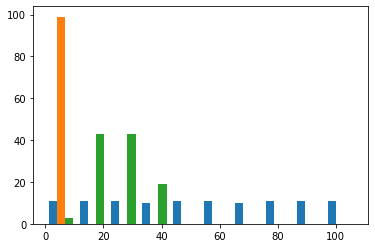

In [8]:
plt.hist(df1)

(array([[ 44.,  51.,  50.,  51.,  51.,  50.,  51.,  50.,  51.,  51.],
        [500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [452.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ -6.81354929,  43.76780564,  94.34916057, 144.9305155 ,
        195.51187043, 246.09322536, 296.67458029, 347.25593521,
        397.83729014, 448.41864507, 499.        ]),
 <a list of 3 BarContainer objects>)

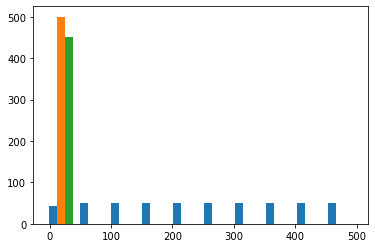

In [9]:
plt.hist(df2)

(array([[852.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 852.],
        [852.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([-13.37967282490625, 1747.2582944575845, 3507.8962617400753,
        5268.534229022566, 7029.172196305057, 8789.810163587548,
        10550.44813087004, 12311.08609815253, 14071.72406543502,
        15832.362032717512, 17593.0], dtype=object),
 <a list of 3 BarContainer objects>)

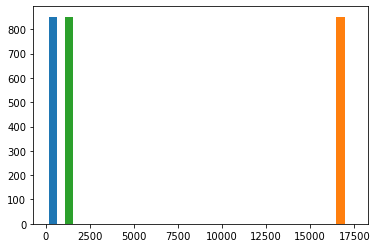

In [10]:
plt.hist(df3)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

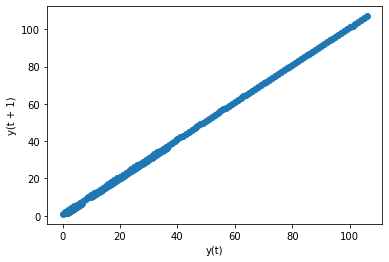

In [11]:
lag_plot(df1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

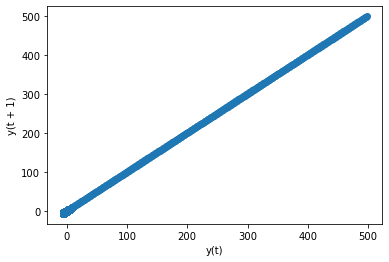

In [12]:
lag_plot(df2)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

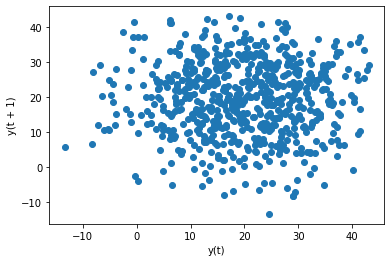

In [13]:
lag_plot(df3.value)

I feel the order of the data matters as it is forming a diagonal line from the bottom-left to the top-right of the plot which shows a positive correlation(stronger for df1 & df2, little weaker for df3) relationship.

In [14]:
newdf1=df1.interpolate()
newdf1

,Unnamed: 0,x,y
0,0,1.40,10.00
1,1,1.45,10.25
2,2,1.50,10.50
3,3,1.55,10.75
4,4,1.60,11.00
...,...,...,...
103,103,6.55,35.75
104,104,6.60,36.00
105,105,6.65,36.25
106,106,6.70,36.50


In [15]:
newdf2=df2.interpolate()
newdf2

,Unnamed: 0,time,value
0,0,0.00,0.000000
1,1,0.02,2.528779
2,2,0.04,2.419020
3,3,0.06,0.665052
4,4,0.08,0.506655
...,...,...,...
495,495,9.90,-2.938926
496,496,9.92,-0.506655
497,497,9.94,-0.665052
498,498,9.96,-2.419020


In [16]:
newvalues_data=df3.value.interpolate()
newdf3 = pd.merge(df3,newvalues_data)
newdf3

,Unnamed: 0,date,value
0,0,2015-11-03,13.394304
1,1,2015-11-04,-3.800715
2,2,2015-11-05,28.098152
3,3,2015-11-06,20.500562
4,4,2015-11-07,33.981955
...,...,...,...
766,847,2018-02-27,14.469096
767,848,2018-02-28,30.466798
768,849,2018-03-01,13.722157
769,850,2018-03-02,16.117787


In [17]:
newdf1.isna().sum()

Unnamed: 0    0
x             0
y             0
dtype: int64

In [18]:
newdf2.isna().sum()

Unnamed: 0    0
time          0
value         0
dtype: int64

In [19]:
newdf3.isna().sum()

Unnamed: 0    0
date          0
value         0
dtype: int64

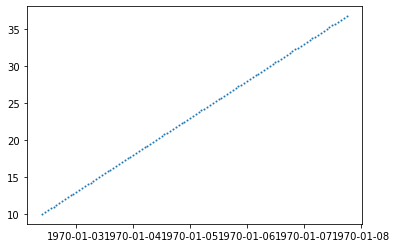

In [20]:
plt.plot_date(x=newdf1['x'],y=newdf1['y'],markersize=1);

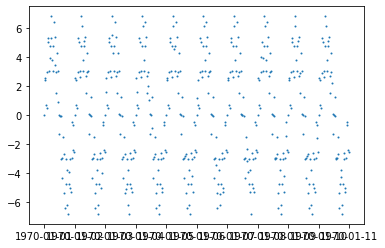

In [21]:
plt.plot_date(x=newdf2['time'],y=newdf2['value'],markersize=1);

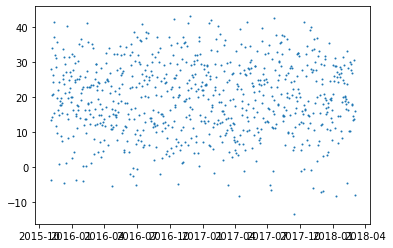

In [22]:
plt.plot_date(x=newdf3['date'],y=newdf3['value'],markersize=1);